# Connected components

A **connected component** of an undirected is a set of nodes, wherein it is possible to 
get from any node $i$ in that set to any other node $j$ by traversing the nodes of that
network. A network is **fully connected** if it has one connected component.

<AxesSubplot:>

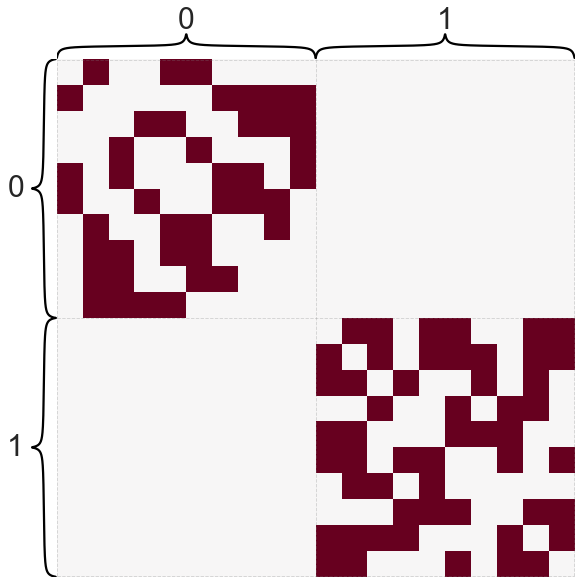

In [ ]:
import numpy as np
from graspologic.simulations import sbm
from graspologic.plot import heatmap

A, labels = sbm([10, 10], [[0.5, 0], [0, 0.5]], return_labels=True)

heatmap(A, inner_hier_labels=labels, cbar=False)

`graspologic` has tools for dealing with connected components. First, it is often useful
to know whether a network is fully connected. 

```{note}
For most applications, if your graph 
has multiple connected components, it makes more sense to treat each component as its own
network and to analyze them separately.
```

In [20]:
from graspologic.utils import is_fully_connected

is_fully_connected(A)

False

In [21]:
import networkx as nx

g = nx.from_numpy_array(A)
is_fully_connected(g)

False

In [22]:
for component in nx.connected_components(g):
    print(len(component))

10
10


For a directed network, there are two notions of connectedness.
- A **weakly connected component** is a set of nodes such that it is possible to get from any node $i$ in the set to any node $j$ in the set *while ignoring edge directions*.
- A **strongly connected component** is a set of nodes such that it is possible to get from any node $i$ in the set to any node $j$ in the set.

Strong connectedness implies weak connectedness. 

Strictly speaking, you have to specify which version of connectedness you mean when talking
about directed networks. However, I think it's more common to assume people mean weakly connected.

This is the version of connectedness for a directed network that `graspologic` means.

In [23]:
A, labels = sbm([10, 10], [[0.5, 0], [0, 0.5]], return_labels=True, directed=True)

is_fully_connected(A)

False

In [24]:
g = nx.from_numpy_array(A, create_using=nx.DiGraph)

nx.is_weakly_connected(g)

False

For data cleaning purposes, it is often helpful to be able to select the **largest connected component**. Just like it sounds, this is just the largest group of nodes in the network which satisfy one of the connectedness properties above.

In [25]:
from graspologic.utils import largest_connected_component

A = sbm([20, 10], [[0.5, 0], [0, 0.5]])

A_lcc = largest_connected_component(A)
A_lcc.shape

(20, 20)